# SchNet-tmQM-xTB (Fe, Cu, Zn, Pd) E, F, mu

In [1]:
import wandb
import pandas as pd

from analysis.helper import extract_config

api = wandb.Api()

## Single element

In [2]:
runs = api.runs(
    "modelforge_nnps/schnet_tmqm_xtb_single_element",
)
print(f"Found {len(runs)} runs")
summary_list, config_list, name_list = [], [], []

Found 45 runs


In [3]:
extract_config(runs[0].config["training_parameter"], "tags")

{'tags': ['E',
  '[[26]]',
  '0.1.4+135.g660b3fb.dirty',
  'TMQM_XTB',
  'SchNet',
  'loss-per_atom_energy']}

In [4]:
test_results = []

for run in runs:
    record = {}

    record.update({"name": run.name})
    
    training_parameter = run.config["training_parameter"]
    tags = extract_config(training_parameter, "tags")["tags"]
    if "E" in tags:
        record["energy"] = True
    else:
        record["energy"] = False
    if "F" in tags:
        record["force"] = True
    else:
        record["force"] = False
    if "mu" in tags:
        record["dipole_moment"] = True
    else:
        record["dipole_moment"] = False
    if "[[26]]" in tags:
        record["Fe"] = True
    else:
        record["Fe"] = False
    if "[[29]]" in tags:
        record["Cu"] = True
    else:
        record["Cu"] = False
    if "[[30]]" in tags:
        record["Zn"] = True
    else:
        record["Zn"] = False
    record["Pd"] = False

    record.update({
        "test/per_system_energy/mae": run.summary["test/per_system_energy/mae"],
        "test/per_system_energy/rmse": run.summary["test/per_system_energy/rmse"],
    })

    record.update(
        extract_config(extract_config(training_parameter, "splitting_strategy")["splitting_strategy"], "seed")
    )

    record["maximum_interaction_radius"] = 0.5
    
    test_results.append(record)

test_results_df = pd.DataFrame(test_results)

In [5]:
test_results_df.sort_values(by="test/per_system_energy/rmse")

,name,energy,force,dipole_moment,Fe,Cu,Zn,Pd,test/per_system_energy/mae,test/per_system_energy/rmse,seed,maximum_interaction_radius
26,EFmu_[[30]](44),True,True,True,False,False,True,False,55.841957,135.391357,44,0.5
44,EFmu_[[30]](46),True,True,True,False,False,True,False,64.302956,143.779083,46,0.5
8,EFmu_[[30]](42),True,True,True,False,False,True,False,60.841343,143.855270,42,0.5
14,EFmu_[[29]](43),True,True,True,False,True,False,False,62.148418,144.634094,43,0.5
23,EFmu_[[29]](44),True,True,True,False,True,False,False,70.661507,145.702957,44,0.5
5,EFmu_[[29]](42),True,True,True,False,True,False,False,63.138340,146.011307,42,0.5
20,EFmu_[[26]](44),True,True,True,True,False,False,False,67.820770,147.477097,44,0.5
2,EFmu_[[26]](42),True,True,True,True,False,False,False,64.835503,149.726089,42,0.5
11,EFmu_[[26]](43),True,True,True,True,False,False,False,71.971100,149.887100,43,0.5
41,EFmu_[[29]](46),True,True,True,False,True,False,False,69.199677,150.515793,46,0.5


## Fe, Cu, Zn, Pd full dataset

In [6]:
runs = api.runs(
    "modelforge_nnps/schnet_tmqm_xtb",
    filters={"display_name": {"$regex": "._PdZnFeCu_T100K_v1\\.1."}},
)
print(f"Found {len(runs)} runs")
summary_list, config_list, name_list = [], [], []

Found 15 runs


In [7]:
len(test_results)

45

In [8]:
for run in runs:
    record = {}

    record.update({"name": run.name})
    
    training_parameter = run.config["training_parameter"]
    tags = extract_config(training_parameter, "tags")["tags"]
    if "E" in tags:
        record["energy"] = True
    else:
        record["energy"] = False
    if "F" in tags:
        record["force"] = True
    else:
        record["force"] = False
    if "mu" in tags:
        record["dipole_moment"] = True
    else:
        record["dipole_moment"] = False
        
    record["Fe"] = True
    record["Cu"] = True
    record["Zn"] = True
    record["Pd"] = True

    record.update({
        "test/per_system_energy/mae": run.summary["test/per_system_energy/mae"],
        "test/per_system_energy/rmse": run.summary["test/per_system_energy/rmse"],
    })

    record.update(
        extract_config(extract_config(training_parameter, "splitting_strategy")["splitting_strategy"], "seed")
    )

    record["maximum_interaction_radius"] = 0.5
    
    test_results.append(record)

test_results_df = pd.DataFrame(test_results)

In [9]:
test_results_df.sort_values(by="test/per_system_energy/rmse")

,name,energy,force,dipole_moment,Fe,Cu,Zn,Pd,test/per_system_energy/mae,test/per_system_energy/rmse,seed,maximum_interaction_radius
26,EFmu_[[30]](44),True,True,True,False,False,True,False,55.841957,135.391357,44,0.5
47,EFmu_PdZnFeCu_T100K_v1.1(42),True,True,True,True,True,True,True,61.961823,139.634918,42,0.5
44,EFmu_[[30]](46),True,True,True,False,False,True,False,64.302956,143.779083,46,0.5
8,EFmu_[[30]](42),True,True,True,False,False,True,False,60.841343,143.855270,42,0.5
14,EFmu_[[29]](43),True,True,True,False,True,False,False,62.148418,144.634094,43,0.5
53,EFmu_PdZnFeCu_T100K_v1.1(44),True,True,True,True,True,True,True,63.197872,145.332428,44,0.5
23,EFmu_[[29]](44),True,True,True,False,True,False,False,70.661507,145.702957,44,0.5
5,EFmu_[[29]](42),True,True,True,False,True,False,False,63.138340,146.011307,42,0.5
20,EFmu_[[26]](44),True,True,True,True,False,False,False,67.820770,147.477097,44,0.5
2,EFmu_[[26]](42),True,True,True,True,False,False,False,64.835503,149.726089,42,0.5


In [10]:
len(test_results_df)

60

## Plotting

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("notebook")

### Dataset splitting consistency

Text(0.5, 1.0, 'Stability of dataset splitting')

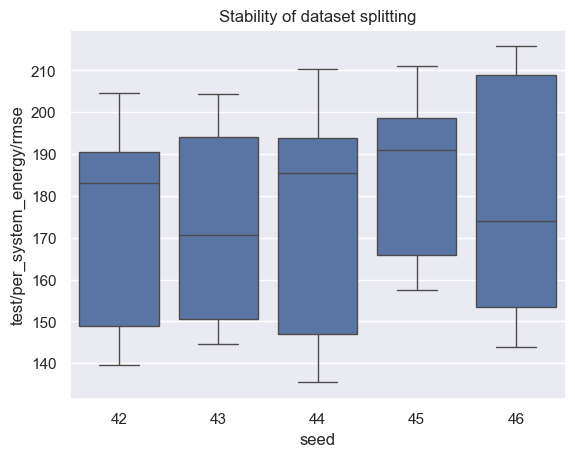

In [12]:
ax = sns.boxplot(
    data=test_results_df,
    x="seed",
    y="test/per_system_energy/rmse",
)
ax.set_title("Stability of dataset splitting")

In [13]:
test_results_df["number_of_TMs"] = test_results_df["Fe"].astype(int) + test_results_df["Cu"].astype(int) + test_results_df["Zn"].astype(int) + test_results_df["Pd"].astype(int)

In [14]:
test_results_df.sort_values(by="test/per_system_energy/rmse")

,name,energy,force,dipole_moment,Fe,Cu,Zn,Pd,test/per_system_energy/mae,test/per_system_energy/rmse,seed,maximum_interaction_radius,number_of_TMs
26,EFmu_[[30]](44),True,True,True,False,False,True,False,55.841957,135.391357,44,0.5,1
47,EFmu_PdZnFeCu_T100K_v1.1(42),True,True,True,True,True,True,True,61.961823,139.634918,42,0.5,4
44,EFmu_[[30]](46),True,True,True,False,False,True,False,64.302956,143.779083,46,0.5,1
8,EFmu_[[30]](42),True,True,True,False,False,True,False,60.841343,143.855270,42,0.5,1
14,EFmu_[[29]](43),True,True,True,False,True,False,False,62.148418,144.634094,43,0.5,1
53,EFmu_PdZnFeCu_T100K_v1.1(44),True,True,True,True,True,True,True,63.197872,145.332428,44,0.5,4
23,EFmu_[[29]](44),True,True,True,False,True,False,False,70.661507,145.702957,44,0.5,1
5,EFmu_[[29]](42),True,True,True,False,True,False,False,63.138340,146.011307,42,0.5,1
20,EFmu_[[26]](44),True,True,True,True,False,False,False,67.820770,147.477097,44,0.5,1
2,EFmu_[[26]](42),True,True,True,True,False,False,False,64.835503,149.726089,42,0.5,1


Text(0.5, 1.0, 'Stability of dataset splitting')

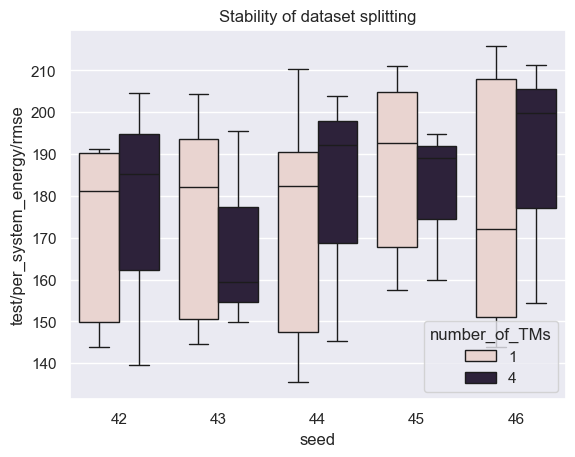

In [15]:
ax = sns.boxplot(
    data=test_results_df,
    x="seed",
    y="test/per_system_energy/rmse",
    hue="number_of_TMs",
)
ax.set_title("Stability of dataset splitting")

### Single-element subset v.s. full dataset

Text(0.5, 1.0, 'Single-element dataset v.s. the mixed-element dataset')

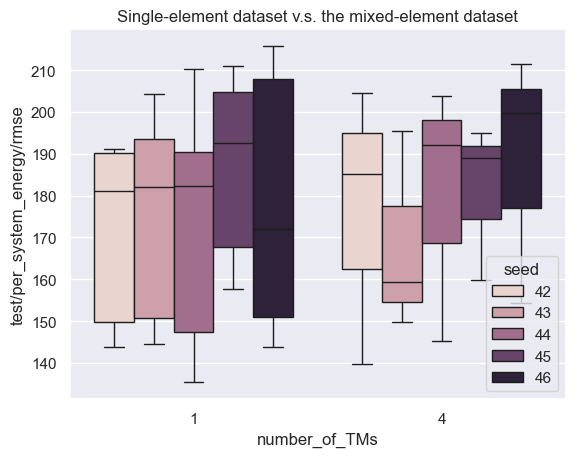

In [16]:
ax = sns.boxplot(
    data=test_results_df,
    x="number_of_TMs",
    y="test/per_system_energy/rmse",
    hue="seed"
)
ax.set_title("Single-element dataset v.s. the mixed-element dataset")

In [17]:
test_results_df["FeCuZnPd"] = (test_results_df["Fe"].astype(int)*1000 + test_results_df["Cu"].astype(int)*100 + test_results_df["Zn"].astype(int)*10 + test_results_df["Pd"].astype(int)).apply(
    lambda x: '{:04}'.format(x)
)

Text(0.5, 1.0, 'Single-element datasets v.s. the mixed-element dataset')

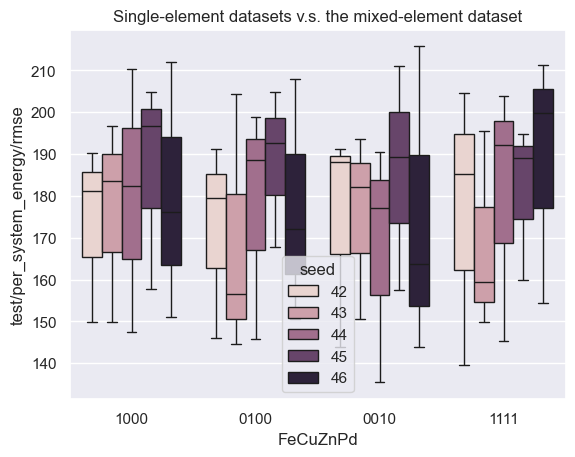

In [18]:
ax = sns.boxplot(
    data=test_results_df,
    x="FeCuZnPd",
    y="test/per_system_energy/rmse",
    hue="seed"
)
ax.set_title("Single-element datasets v.s. the mixed-element dataset")

### Compare loss functions

In [19]:
EF = test_results_df[test_results_df["dipole_moment"] == False]

Text(0.5, 1.0, 'Impact of adding force loss term')

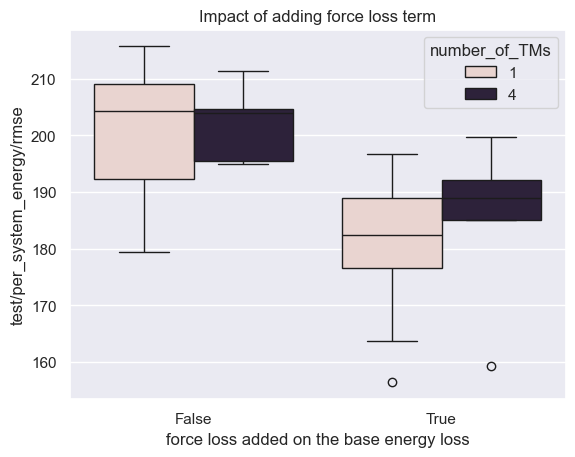

In [20]:
ax = sns.boxplot(
    data=EF,
    x="force",
    y="test/per_system_energy/rmse",
    hue="number_of_TMs"
)
ax.set_xlabel("force loss added on the base energy loss")
ax.set_title("Impact of adding force loss term")

In [21]:
test_results_df["E/F/mu"] = (test_results_df["energy"].astype(int)*100 + test_results_df["force"].astype(int)*10 + test_results_df["dipole_moment"].astype(int)).apply(
    lambda x: '{:03}'.format(x)
)

Text(0.5, 1.0, 'Impact of adding forces and/or dipole moments to loss')

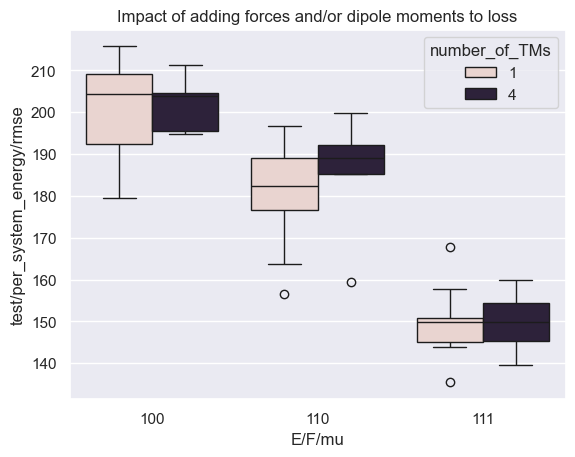

In [22]:
ax = sns.boxplot(
    data=test_results_df,
    x="E/F/mu",
    y="test/per_system_energy/rmse",
    hue="number_of_TMs"
)
ax.set_title("Impact of adding forces and/or dipole moments to loss")

##  Load trainings with maximum interaction radius 6~10Å

In [23]:
runs = api.runs(
    "modelforge_nnps/schnet_tmqm_xtb",
    filters={"display_name": {"$regex": "maximum_interaction_radius_."}},
)
print(f"Found {len(runs)} runs")
summary_list, config_list, name_list = [], [], []

Found 25 runs


In [24]:
for run in runs:
    record = {}

    record.update({"name": run.name})
    
    training_parameter = run.config["training_parameter"]
    potential_parameter = run.config["potential_parameter"]
    tags = extract_config(training_parameter, "tags")["tags"]
    if "E" in tags:
        record["energy"] = True
    else:
        record["energy"] = False
    if "F" in tags:
        record["force"] = True
    else:
        record["force"] = False
    if "mu" in tags:
        record["dipole_moment"] = True
    else:
        record["dipole_moment"] = False
        
    record["Fe"] = True
    record["Cu"] = True
    record["Zn"] = True
    record["Pd"] = True

    record.update({
        "test/per_system_energy/mae": run.summary["test/per_system_energy/mae"],
        "test/per_system_energy/rmse": run.summary["test/per_system_energy/rmse"],
    })

    record.update(
        extract_config(extract_config(training_parameter, "splitting_strategy")["splitting_strategy"], "seed")
    )

    record["maximum_interaction_radius"] = round(extract_config(run.config["potential_parameter"], "maximum_interaction_radius")["maximum_interaction_radius"], 1)
    
    test_results.append(record)

test_results_df = pd.DataFrame(test_results)

In [34]:
test_results_df["number_of_TMs"] = test_results_df["Fe"].astype(int) + test_results_df["Cu"].astype(int) + test_results_df["Zn"].astype(int) + test_results_df["Pd"].astype(int)
test_results_df["E/F/mu"] = (test_results_df["energy"].astype(int)*100 + test_results_df["force"].astype(int)*10 + test_results_df["dipole_moment"].astype(int)).apply(
    lambda x: '{:03}'.format(x)
)

In [35]:
test_results_df.sort_values(by="test/per_system_energy/rmse")

,name,energy,force,dipole_moment,Fe,Cu,Zn,Pd,test/per_system_energy/mae,test/per_system_energy/rmse,seed,maximum_interaction_radius,number_of_TMs,E/F/mu
26,EFmu_[[30]](44),True,True,True,False,False,True,False,55.841957,135.391357,44,0.5,1,111
47,EFmu_PdZnFeCu_T100K_v1.1(42),True,True,True,True,True,True,True,61.961823,139.634918,42,0.5,4,111
65,maximum_interaction_radius_6(43),True,True,True,True,True,True,True,63.425690,141.776825,43,0.6,4,111
44,EFmu_[[30]](46),True,True,True,False,False,True,False,64.302956,143.779083,46,0.5,1,111
8,EFmu_[[30]](42),True,True,True,False,False,True,False,60.841343,143.855270,42,0.5,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,E_[[26]](44),True,False,False,True,False,False,False,125.444878,210.250137,44,0.5,1,100
33,E_[[30]](45),True,False,False,False,False,True,False,129.587692,210.955826,45,0.5,1,100
58,E_PdZnFeCu_T100K_v1.1(46),True,False,False,True,True,True,True,125.053482,211.361145,46,0.5,4,100
36,E_[[26]](46),True,False,False,True,False,False,False,129.788605,212.078247,46,0.5,1,100


In [31]:
len(test_results_df)

85

## Plot the impact of maximum interaction radius

Text(0.5, 1.0, 'Impact of maximum interaction radius to loss')

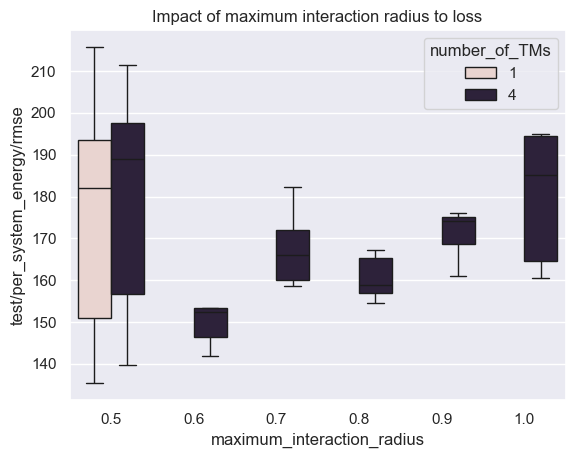

In [33]:
ax = sns.boxplot(
    data=test_results_df,
    x="maximum_interaction_radius",
    y="test/per_system_energy/rmse",
    hue="number_of_TMs"
)
ax.set_title("Impact of maximum interaction radius to loss")

Text(0.5, 1.0, 'Impact of maximum interaction radius to loss')

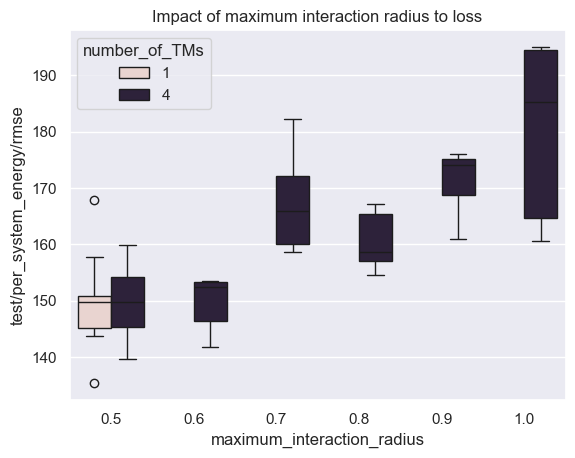

In [39]:
ax = sns.boxplot(
    data=test_results_df[test_results_df["dipole_moment"] == True],
    x="maximum_interaction_radius",
    y="test/per_system_energy/rmse",
    hue="number_of_TMs"
)
ax.set_title("Impact of maximum interaction radius to loss")